In [2]:
    import pandas as pd   
    import numpy as np  
    import matplotlib.pyplot as plt
    import seaborn as sns


4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [64]:
gdp_df=pd.read_csv('../data/gdp_percapita.csv') 
print(gdp_df.head())

  Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2020  1970.560169              NaN
1     Afghanistan  2019  2065.036235              NaN
2     Afghanistan  2018  2033.804389              NaN
3     Afghanistan  2017  2058.400221              NaN
4     Afghanistan  2016  2057.067978              NaN


In [21]:
print(gdp_df)

     Country or Area  Year        Value  Value Footnotes
0        Afghanistan  2020  1970.560169              NaN
1        Afghanistan  2019  2065.036235              NaN
2        Afghanistan  2018  2033.804389              NaN
3        Afghanistan  2017  2058.400221              NaN
4        Afghanistan  2016  2057.067978              NaN
...              ...   ...          ...              ...
7171        Zimbabwe  1994  2603.927369              NaN
7172        Zimbabwe  1993  2420.092791              NaN
7173        Zimbabwe  1992  2437.152908              NaN
7174        Zimbabwe  1991  2733.696626              NaN
7175        Zimbabwe  1990  2652.129209              NaN

[7176 rows x 4 columns]


5. How many rows and columns are in `gdp_df`? Answer= 7176 rows x 4 columns What are the data types of each column? Country or Area(text), Year(numeric) , Value(float), Value(blank) Footnotes (NaN)

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.


In [419]:
gdp_df.rename(columns = {'Country or Area':'Country', 'Value':'GDP_Per_Capita'}, inplace = True)
gdp_df=gdp_df.drop(columns=['Value Footnotes'])

KeyError: "['Value Footnotes'] not found in axis"

In [127]:
gdp_df.rename(columns = {'Country or Area':'Country', 'Value':'GDP_Per_Capita'}, inplace = True)
print (gdp_df)

          Country  Year  GDP_Per_Capita
0     Afghanistan  2020     1970.560169
1     Afghanistan  2019     2065.036235
2     Afghanistan  2018     2033.804389
3     Afghanistan  2017     2058.400221
4     Afghanistan  2016     2057.067978
...           ...   ...             ...
7171     Zimbabwe  1994     2603.927369
7172     Zimbabwe  1993     2420.092791
7173     Zimbabwe  1992     2437.152908
7174     Zimbabwe  1991     2733.696626
7175     Zimbabwe  1990     2652.129209

[7176 rows x 3 columns]


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? (2) Count the NaN under a single DataFrame column: df['your column name'].isnull().sum()df.isnull().values.any() dataframe[dataframe[‘column_name’].isin(list_of_strings)]employee.groupby(['DEPT','GENDER'],as_index=False)
gdp_df.groupby(["Country"])["Year"].count()

In [119]:
group1=gdp_df.groupby(['Country'])['Year'].count()
print(group1)

Country
Afghanistan                    19
Africa Eastern and Southern    31
Africa Western and Central     31
Albania                        31
Algeria                        31
                               ..
Vietnam                        31
West Bank and Gaza             27
World                          31
Zambia                         31
Zimbabwe                       31
Name: Year, Length: 242, dtype: int64


In [255]:
group2=gdp_df.groupby(['Year']) ['Country'].count()
print(group2)


Year
1990    206
1991    207
1992    208
1993    209
1994    211
1995    222
1996    222
1997    226
1998    226
1999    227
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2006    237
2007    237
2008    238
2009    239
2010    239
2011    240
2012    240
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    241
2020    240
Name: Country, dtype: int64


8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?plt.hist(df['Age'])
plt.hist(gdp_df['GDP_Per_Capita'])

sns.distplot( a=df["sepal_length"], hist=True, kde=False, rug=False )

In [373]:
gdp2020=  (gdp_df['Year']==2020)
gdp_df[gdp2020]
gdp20= gdp_df[gdp2020] & gdp_df['GDP_Per_Capita']
gdp_df[gdp20]




TypeError: unsupported operand type(s) for &: 'str' and 'bool'

a density plot sns.kdeplot(df['sepal_width'])

<Axes: ylabel='Density'>

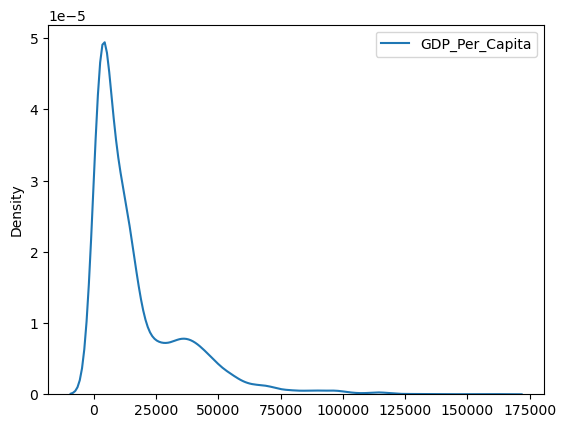

In [351]:
gdp2020=gdp_df['Year']==2020
sns.kdeplot([gdp_df.GDP_Per_Capita])

boxplot plt.boxplot(gdp_df['GDP_Per_Capita'])

In [438]:
gdp2020=gdp_df['Year']==2020
gdp_df[gdp2020]
plt.boxplot(gdp_df.loc[gdp2020,gdp_df[GDP_Per_Capita]])

KeyError: 'Value'

violin plot sns.violinplot(x=df["species"], y=df["sepal_length"])

In [398]:
gdpyear2020= gdp_df['Year'] == 2020
sns.violinplot(x=gdp_df[gdpyear2020], y=gdp_df["GDP_Per_Capita"])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

9. What was the median GDP per capita value in 2020?gdp_2020 = gdp_df.loc[gdp_df['Year'] == 2020]print("GDP per capita, 2020 : ", gdp_2020['GDP_Per_Capita'].median())

In [165]:
gdp_year= gdp_df.loc[gdp_df['Year'] ==2020]
print('GDP_Per_Capita, 2020:', gdp_year['GDP_Per_Capita'].median())

GDP_Per_Capita, 2020: 12908.9374056206


10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.
new = data["Gender"].isin(["Male"])

<Axes: >

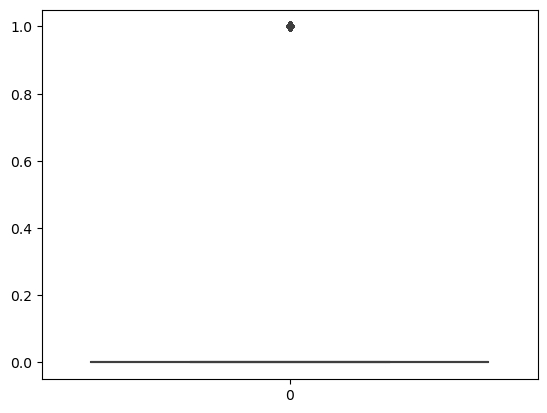

In [357]:
gdp_decades=gdp_df['Year'].isin([1990,2000,2010,2020])
gdp_df[gdp_decades]
sns.boxplot(gdp_decades)

(<Axes: >,
 0       1970.560169
 1       2065.036235
 2       2033.804389
 3       2058.400221
 4       2057.067978
            ...     
 7171    2603.927369
 7172    2420.092791
 7173    2437.152908
 7174    2733.696626
 7175    2652.129209
 Name: GDP_Per_Capita, Length: 7176, dtype: float64)

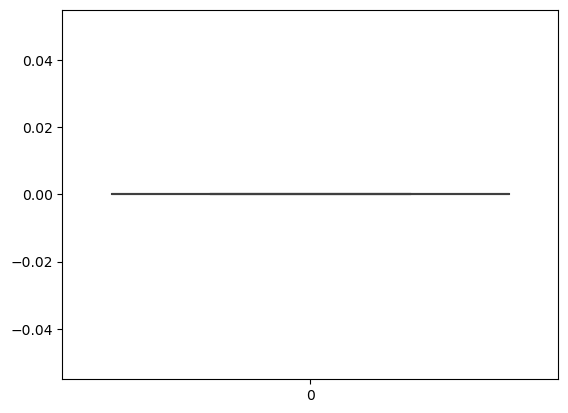

In [433]:
gdp_decades = ('1990', '2000', '2010','2020')
gdp_d=gdp_df['Year'].isin(gdp_decades)
sns.boxplot(gdp_d),(gdp_df['GDP_Per_Capita'])

11. Which country was the first to have a GDP per capita greater than $100,000? : df['A'].where(df['A']>df['B'])

In [381]:
greater= gdp_df['GDP_Per_Capita'] > 100000
gdp_df.loc[greater,['Country','Year']]

,Country,Year
3882,Luxembourg,2020
3883,Luxembourg,2019
3884,Luxembourg,2018
3885,Luxembourg,2017
3886,Luxembourg,2016
3887,Luxembourg,2015
3888,Luxembourg,2014
3889,Luxembourg,2013
3890,Luxembourg,2012
3891,Luxembourg,2011


12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.data.groupby(['Country','Place'])['Value'].max()

In [393]:
gdpyear2020= gdp_df['Year'] == 2020
gdp_df.loc[gdpyear2020,['Country','GDP_Per_Capita','Year']].max()


Country                Zimbabwe
GDP_Per_Capita    112557.309472
Year                       2020
dtype: object

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?m

In [394]:
gdpyear2020= gdp_df['Year'] == 2020
gdp_df.loc[gdpyear2020,['Country','GDP_Per_Capita','Year']].min()

Country           Afghanistan
GDP_Per_Capita     731.064074
Year                     2020
dtype: object

Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.
gdp_df.rename(columns = {'Country or Area':'Country', 'Value':'GDP_Per_Capita'}, inplace = True)
gdp_df=gdp_df.drop(columns=['Value Footnotes'])

In [474]:
internet_df = pd.read_csv('../data/internet_use.csv', sep='delimiter', header= None )


                                                      0
0     "Country or Area","Year","Value","Value Footno...
1                        "Afghanistan","2014","6.39",""
2                         "Afghanistan","2013","5.9",""
3            "Afghanistan","2012","5.45454545454545",""
4                           "Afghanistan","2011","5",""
...                                                 ...
4680                           "176","NTIA/CPS survey."
4681  "177","Pew Internet Project, "Internet, Broadb...
4682  "178","Estimated based on Survey's results. Po...
4683             "179","Preliminary. Country estimate."
4684  "180","The methodology used to estimated the f...

[4685 rows x 1 columns]


C:\Users\rober\AppData\Local\Temp\ipykernel_6148\1546452439.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  internet_df = pd.read_csv('../data/internet_use.csv', sep='delimiter', header= None )


15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [471]:
internet_df.rename(columns = {'Country or Area': 'Country'}, inplace = True)
print(internet_df)


                                                      0
0     "Country or Area","Year","Value","Value Footno...
1                        "Afghanistan","2014","6.39",""
2                         "Afghanistan","2013","5.9",""
3            "Afghanistan","2012","5.45454545454545",""
4                           "Afghanistan","2011","5",""
...                                                 ...
4680                           "176","NTIA/CPS survey."
4681  "177","Pew Internet Project, "Internet, Broadb...
4682  "178","Estimated based on Survey's results. Po...
4683             "179","Preliminary. Country estimate."
4684  "180","The methodology used to estimated the f...

[4685 rows x 1 columns]


16. Look at the number of observations in this dataset per year. What do you notice?